# Feature Visualizations
Using some other techniques of feature engineering, we are gonna try different visualizations of multi-dimensional data to try to get some more insights about it.

In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# add utils to the path
sys.path.append('/mnt/data/workspace/machine-learning/src')

# load the cleaned data
user_data_df = pd.read_csv('./user_data_cleaned.csv', index_col=0)

# split the dataset to make sure we don't peek into test data
train = user_data_df[
    (user_data_df['airing_start_date'] >= '2014-01-01') & (user_data_df['airing_start_date'] < '2017-01-01')
]

## PCA Projection

<IPython.core.display.Javascript object>


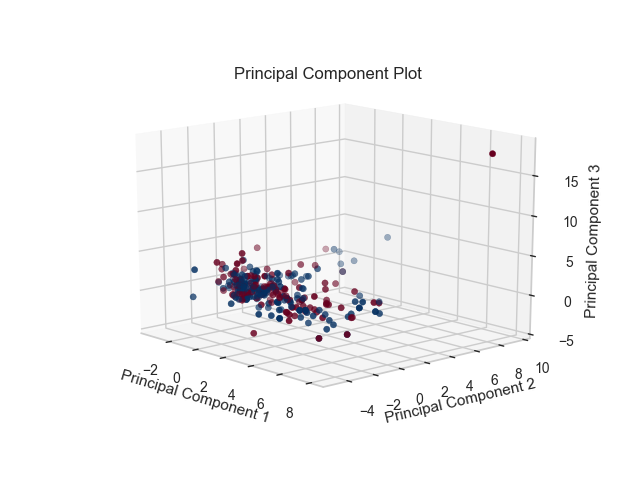

In [6]:
import matplotlib.pyplot as plt
from util.transformers import Raiser, StringSplitter
from sklearn.preprocessing import Imputer, LabelEncoder, OneHotEncoder, Binarizer, MultiLabelBinarizer
from sklearn_pandas import DataFrameMapper, CategoricalImputer, gen_features 
from yellowbrick.features import PCADecomposition
    
parallel_df = train[
    (train.user_status == 'Completed') |  (train.user_status == 'Dropped')
].copy()

# map features
feature_mapper = DataFrameMapper(
    gen_features(
        columns=['source', 'type', 'rating'],
        classes=[{'class': CategoricalImputer}, {'class': LabelEncoder}, {'class': Raiser}, {'class': OneHotEncoder}]
    ) + gen_features(
        columns=['genres', 'studios'],
        classes=[{'class': StringSplitter}, {'class': MultiLabelBinarizer}]
    ) + [
        (['score'], Binarizer(threshold=6), {'alias': 'liked'}),
    ],
    df_out=True
)

parallel_df = feature_mapper.fit_transform(parallel_df)

# train and show visualizer
y = parallel_df.liked.values
X = parallel_df.drop('liked', axis=1).values

%matplotlib notebook

visualizer = PCADecomposition(scale=True, center=False, color=y, proj_dim=3)
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

<IPython.core.display.Javascript object>


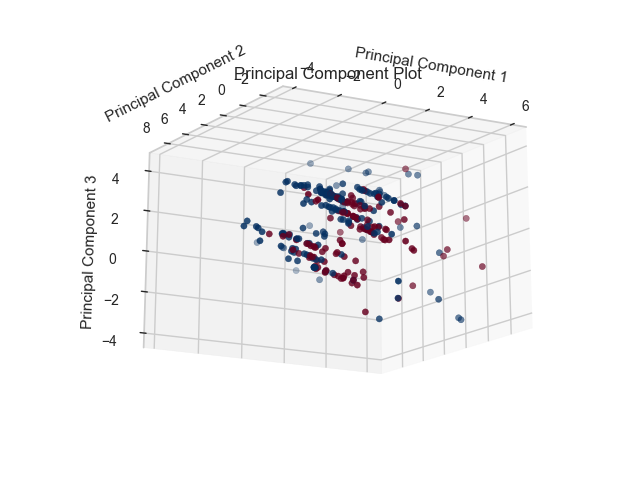

In [7]:
import matplotlib.pyplot as plt
from util.transformers import Raiser, StringSplitter
from sklearn.preprocessing import Imputer, LabelEncoder, OneHotEncoder, Binarizer
from sklearn_pandas import DataFrameMapper, CategoricalImputer, gen_features 
from yellowbrick.features import PCADecomposition
    
parallel2_df = train[
    (train.user_status == 'Completed') |  (train.user_status == 'Dropped')
].copy()

# map features
feature_mapper = DataFrameMapper(
    gen_features(
        columns=[['mean_score_count'], ['mean_score_value'], ['episodes'], ['duration']],
        classes=[{'class': Imputer}]
    ) + gen_features(
        columns=['source', 'type', 'rating'],
        classes=[{'class': CategoricalImputer}, {'class': LabelEncoder}, {'class': Raiser}, {'class': OneHotEncoder}]
    ) + [
        (['score'], Binarizer(threshold=6), {'alias': 'liked'}),
    ],
    df_out=True
)

parallel2_df = feature_mapper.fit_transform(parallel2_df)

# train and show visualizer
y = parallel2_df.liked.values
X = parallel2_df.drop('liked', axis=1).values

%matplotlib notebook

visualizer = PCADecomposition(scale=True, center=False, color=y, proj_dim=3)
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

## Manifold

<IPython.core.display.Javascript object>


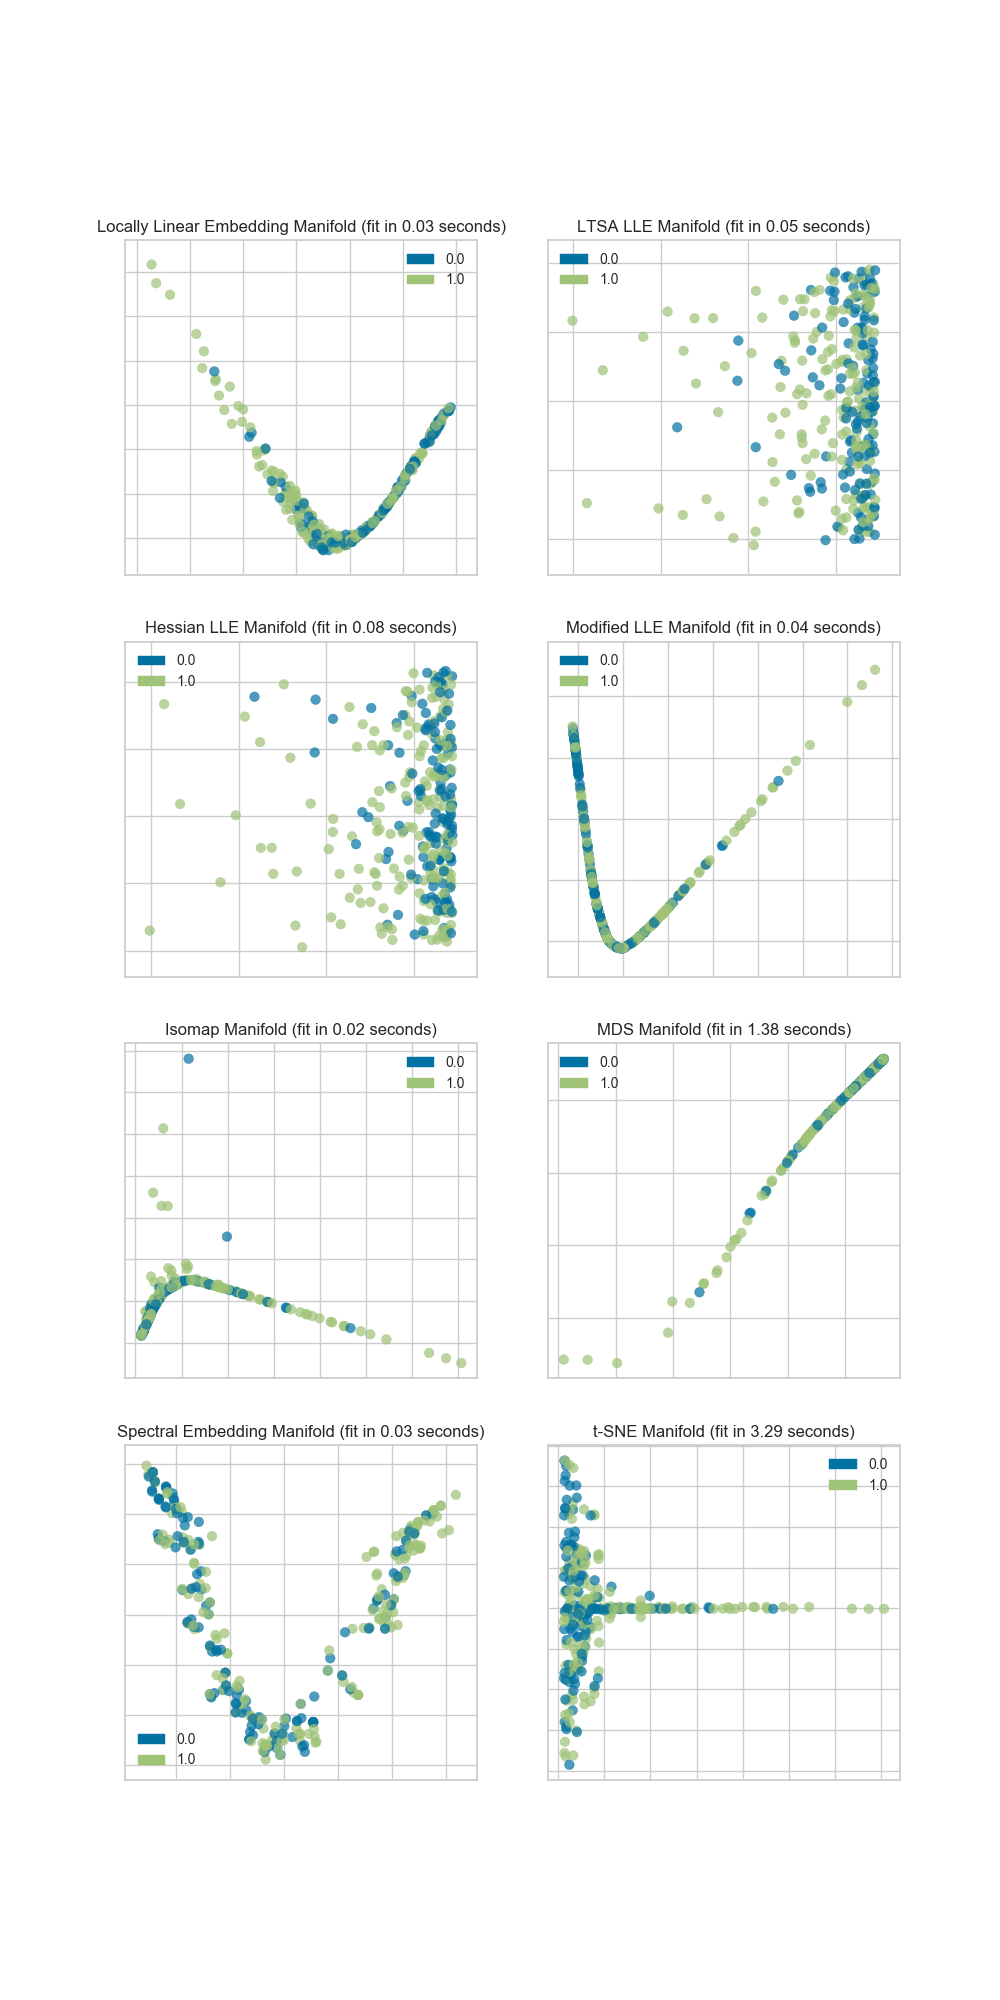

In [9]:
import matplotlib.pyplot as plt
from util.transformers import Raiser, StringSplitter
from sklearn.preprocessing import Imputer, LabelEncoder, OneHotEncoder, Binarizer
from sklearn_pandas import DataFrameMapper, CategoricalImputer, gen_features 
from yellowbrick.features.manifold import Manifold, DISCRETE, MANIFOLD_ALGORITHMS

class ManifoldT(Manifold):
    def transform(X, y=None):
        return X

manifold_df = train[
    (train.user_status == 'Completed') |  (train.user_status == 'Dropped')
].copy()

# map features
feature_mapper = DataFrameMapper(
    gen_features(
        columns=[['mean_score_count'], ['mean_score_value'], ['episodes'], ['duration']],
        classes=[{'class': Imputer}]
    ) + gen_features(
        columns=['source', 'type', 'rating'],
        classes=[{'class': CategoricalImputer}, {'class': LabelEncoder}, {'class': Raiser}, {'class': OneHotEncoder}]
    ) + [
        (['score'], Binarizer(threshold=6), {'alias': 'liked'}),
    ],
    df_out=True
)

manifold_df = feature_mapper.fit_transform(manifold_df)

# train and show visualizer
y = manifold_df.liked
X = manifold_df.drop('liked', axis=1)

%matplotlib notebook
fig = plt.figure(figsize=(10, 20))
axes = [
    fig.add_subplot(421),
    fig.add_subplot(422),
    fig.add_subplot(423),
    fig.add_subplot(424),
    fig.add_subplot(425),
    fig.add_subplot(426),
    fig.add_subplot(427),
    fig.add_subplot(428),
]

for ax, algo in zip(axes, MANIFOLD_ALGORITHMS.keys()):
    visualizer = ManifoldT(manifold=algo, target=DISCRETE, ax=ax)
    visualizer.fit_transform(X, y)
    visualizer.poof()

<IPython.core.display.Javascript object>


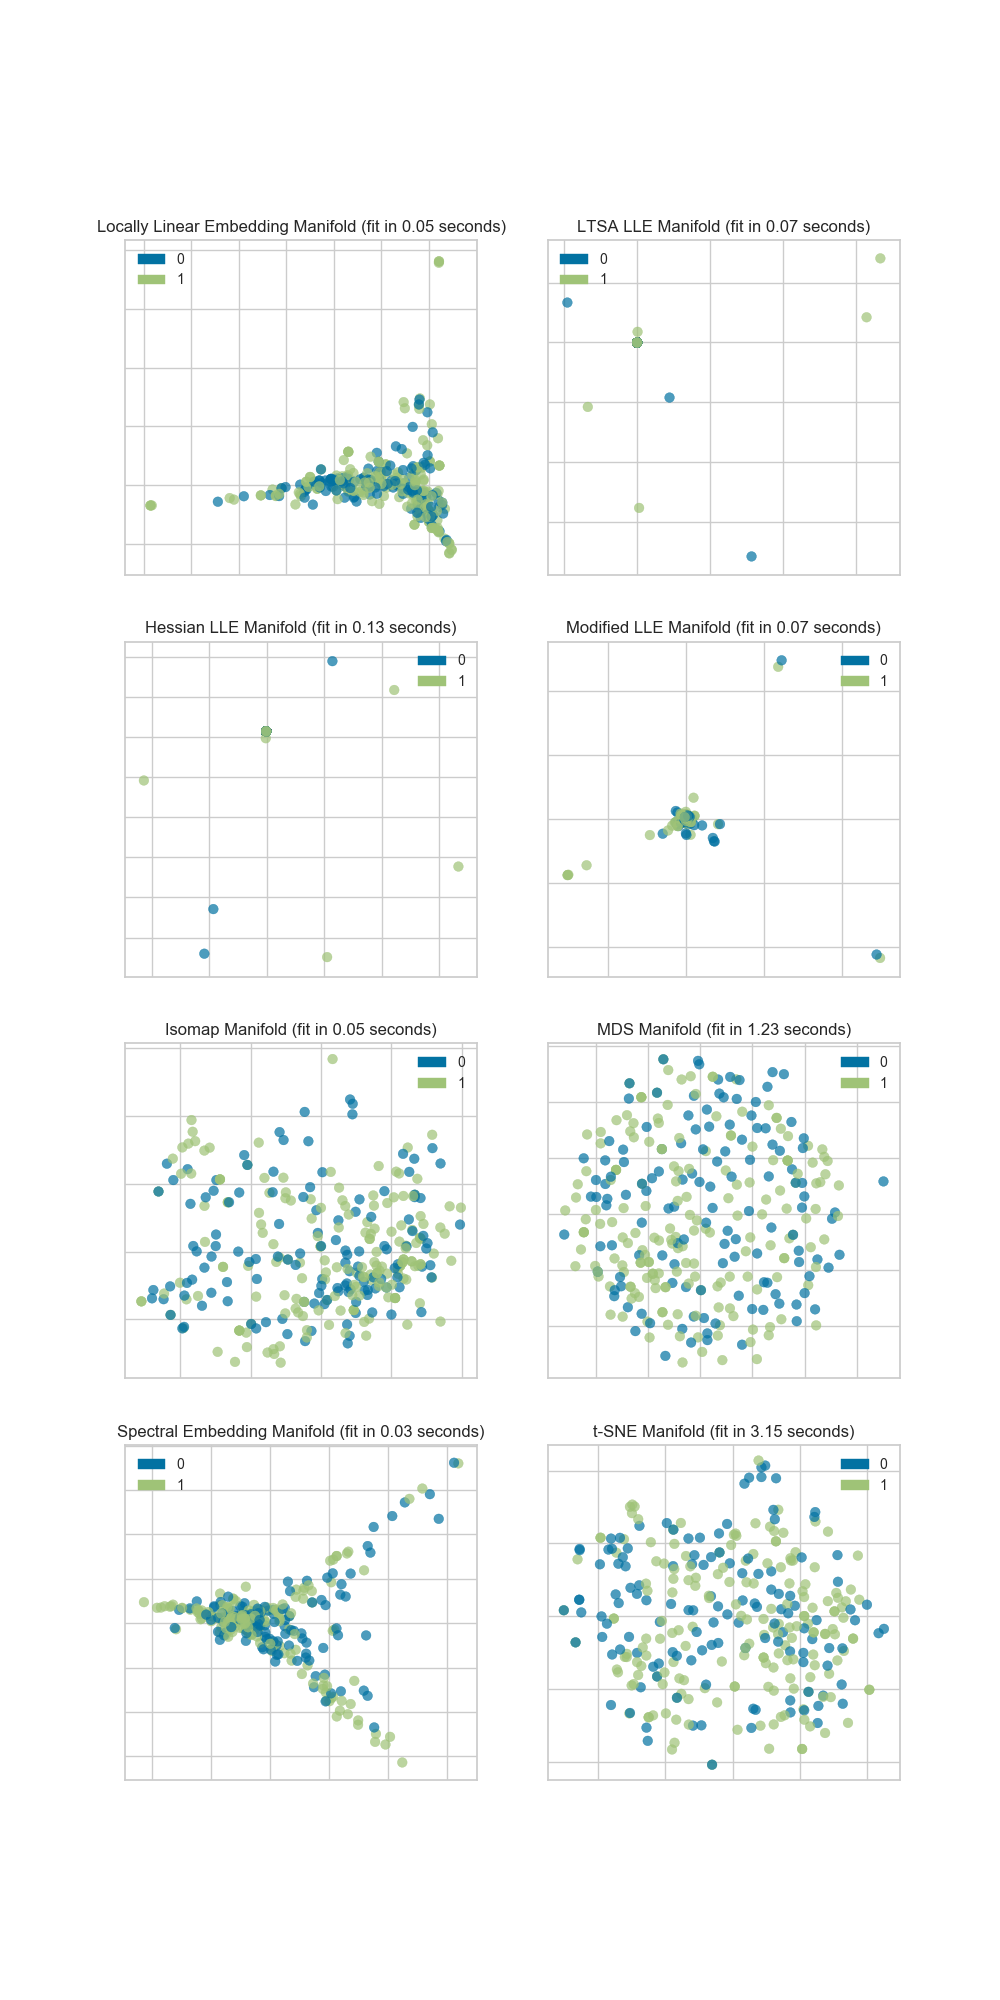

In [10]:
import matplotlib.pyplot as plt
from util.transformers import Raiser, StringSplitter
from sklearn.preprocessing import Imputer, LabelEncoder, OneHotEncoder, Binarizer
from sklearn_pandas import DataFrameMapper, CategoricalImputer, gen_features 
from yellowbrick.features.manifold import Manifold, DISCRETE, MANIFOLD_ALGORITHMS

class ManifoldT(Manifold):
    def transform(X, y=None):
        return X

manifold2_df = train[
    ((train.user_status == 'Completed') & (train.score != 0)) |  (train.user_status == 'Dropped')
].copy()

# map features
feature_mapper = DataFrameMapper(
    gen_features(
        columns=['genres', 'studios'],
        classes=[{'class': StringSplitter}, {'class': MultiLabelBinarizer}]
    ) + [
        (['score'], Binarizer(threshold=6), {'alias': 'liked'}),
    ],
    df_out=True
)

manifold2_df = feature_mapper.fit_transform(manifold2_df)

# train and show visualizer
y = manifold2_df.liked
X = manifold2_df.drop('liked', axis=1)

%matplotlib notebook
fig = plt.figure(figsize=(10, 20))
axes = [
    fig.add_subplot(421),
    fig.add_subplot(422),
    fig.add_subplot(423),
    fig.add_subplot(424),
    fig.add_subplot(425),
    fig.add_subplot(426),
    fig.add_subplot(427),
    fig.add_subplot(428),
]

for ax, algo in zip(axes, MANIFOLD_ALGORITHMS.keys()):
    visualizer = ManifoldT(manifold=algo, target=DISCRETE, ax=ax)
    
    if algo in ['lle', 'ltsa', 'hessian', 'modified']:
        visualizer.manifold.eigen_solver = 'dense'
        
    visualizer.fit_transform(X, y)
    visualizer.poof()

<IPython.core.display.Javascript object>


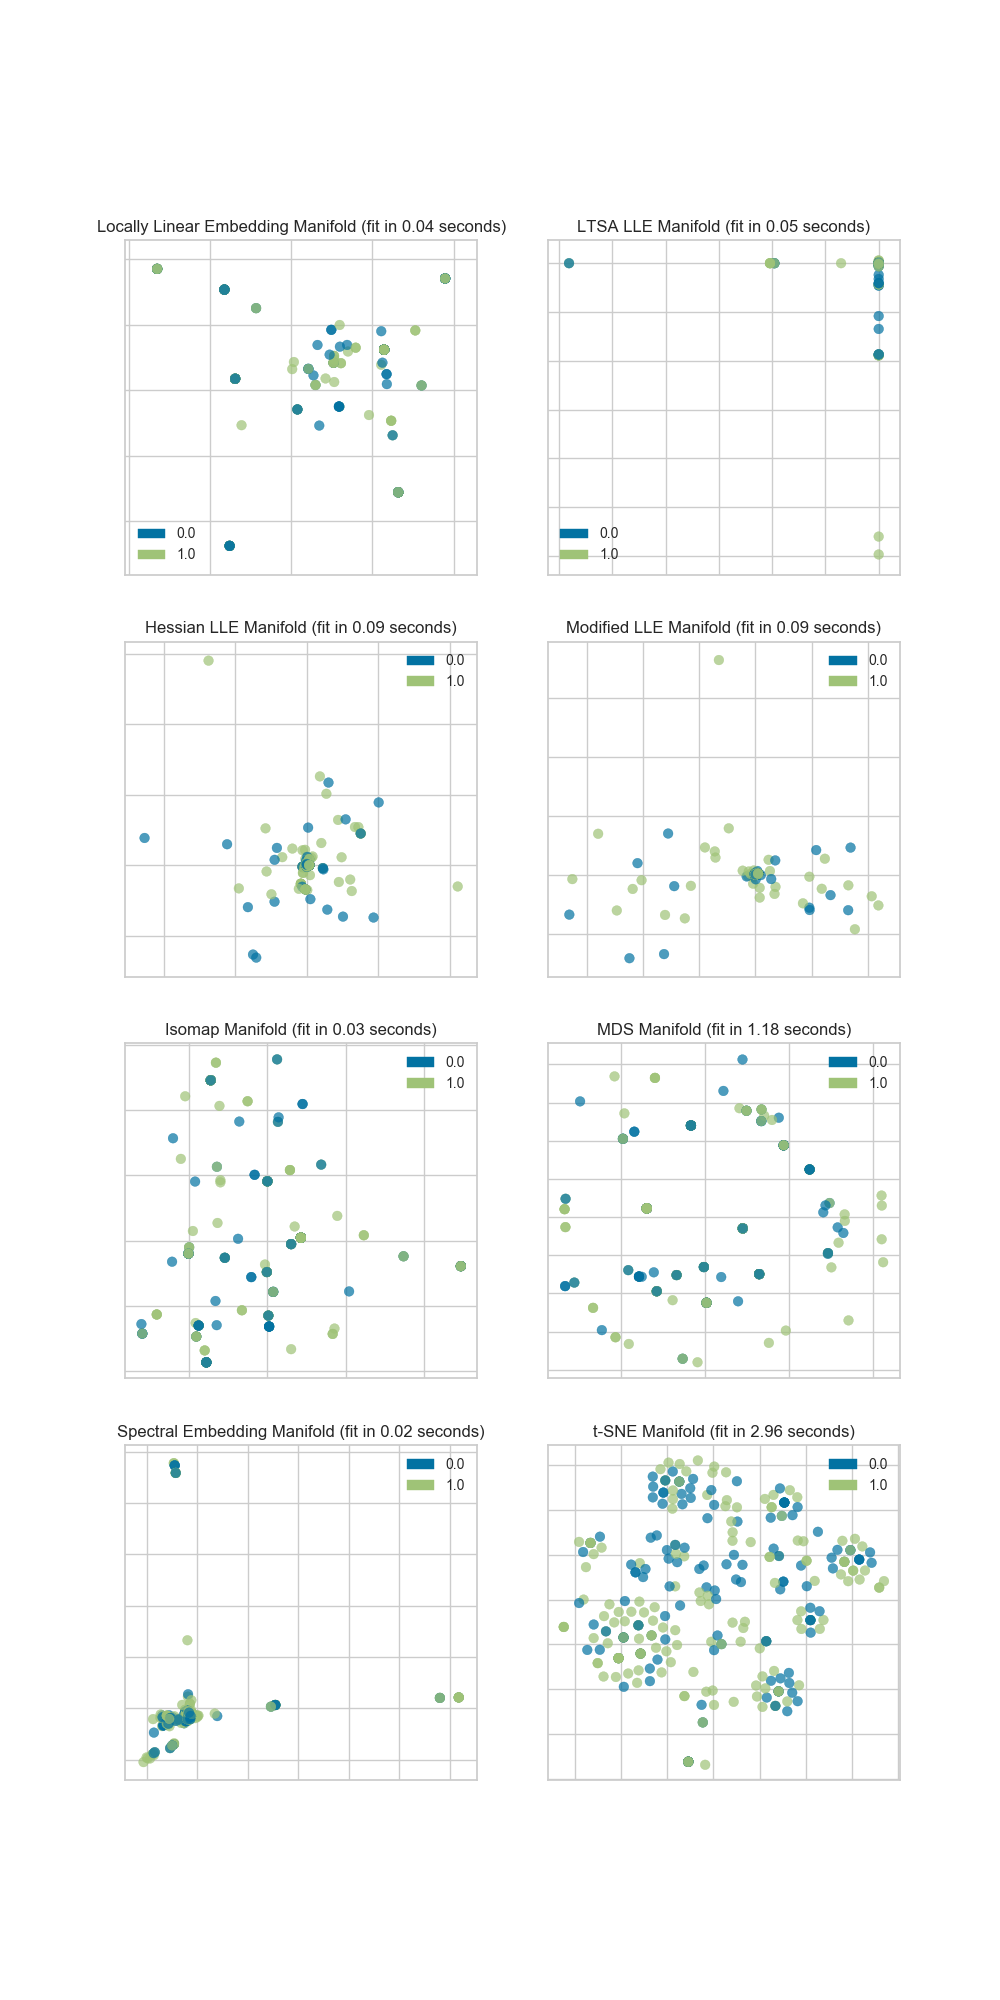

/mnt/data/workspace/machine-learning/env/lib/python3.6/site-packages/sklearn/manifold/locally_linear.py:412: RuntimeWarning: divide by zero encountered in true_divide
  tmp[:, :nev] /= evals + reg[:, None]
/mnt/data/workspace/machine-learning/env/lib/python3.6/site-packages/sklearn/manifold/locally_linear.py:422: RuntimeWarning: invalid value encountered in true_divide
  rho = evals[:, n_components:].sum(1) / evals[:, :n_components].sum(1)
/mnt/data/workspace/machine-learning/env/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/mnt/data/workspace/machine-learning/env/lib/python3.6/site-packages/sklearn/manifold/locally_linear.py:430: RuntimeWarning: invalid value encountered in true_divide
  eta_range = evals_cumsum[:, -1:] / evals_cumsum[:, :-1] - 1
/mnt/data/workspace/machine-learning/env/lib/python3.6/site-packages/sklearn/manifold/locally_linear.py:443: RuntimeWarning: invalid value encountered

In [11]:
import matplotlib.pyplot as plt
from util.transformers import Raiser
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn_pandas import DataFrameMapper, CategoricalImputer, gen_features 
from yellowbrick.features.manifold import Manifold, DISCRETE, MANIFOLD_ALGORITHMS

class ManifoldT(Manifold):
    def transform(X, y=None):
        return X

manifold2_df = train[
    ((train.user_status == 'Completed') & (train.score != 0)) |  (train.user_status == 'Dropped')
].copy()

# map features
feature_mapper = DataFrameMapper(
    gen_features(
        columns=['source', 'type', 'rating'],
        classes=[{'class': CategoricalImputer}, {'class': LabelEncoder}, {'class': Raiser}, {'class': OneHotEncoder}]
    ) + [
        (['score'], Binarizer(threshold=6), {'alias': 'liked'}),
    ],
    df_out=True
)

manifold2_df = feature_mapper.fit_transform(manifold2_df)

# train and show visualizer
y = manifold2_df.liked
X = manifold2_df.drop('liked', axis=1)

%matplotlib notebook
fig = plt.figure(figsize=(10, 20))
axes = [
    fig.add_subplot(421),
    fig.add_subplot(422),
    fig.add_subplot(423),
    fig.add_subplot(424),
    fig.add_subplot(425),
    fig.add_subplot(426),
    fig.add_subplot(427),
    fig.add_subplot(428),
]

for ax, algo in zip(axes, MANIFOLD_ALGORITHMS.keys()):
    visualizer = ManifoldT(manifold=algo, target=DISCRETE, ax=ax)
    
    if algo in ['lle', 'ltsa', 'hessian', 'modified']:
        visualizer.manifold.eigen_solver = 'dense'
        
    visualizer.fit_transform(X, y)
    visualizer.poof()